In [11]:
import sqlite3
import pandas
database_name = "/home/becode/Downloads/Documents/churn_prediction/data/database.db"
conn = sqlite3.connect(database_name)
df = pandas.read_sql('SELECT * FROM bank_churners', conn)
#df = df[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book']]
conn.close()

In [13]:
import sqlite3
import pandas
import sqlite3
import pandas
import pickle
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
database_name = "/home/becode/Downloads/Documents/churn_prediction/data/database.db"
conn = sqlite3.connect(database_name)

    # code added for ml model   Marital_Status,
df = pandas.read_sql('SELECT Total_Relationship_Count, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Trans_Amt, Total_Trans_Ct FROM bank_churners', conn)
y = pandas.read_sql('SELECT Attrition_Flag FROM bank_churners', conn)
conn.close()
    
numeric_features = df.select_dtypes(exclude="object").columns
numeric_transformer = Pipeline(steps=[('poly', PolynomialFeatures(degree =2)), ('scaler', StandardScaler())])

categorical_features = df.select_dtypes(include='object').columns
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])
clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier',  DecisionTreeClassifier(max_depth=2, random_state=1))])

# Create a parameter grid
params = {
   'feature_selection__k':[10, 20],
    'clf__n_estimators':[2, 5]}

# Initialize the grid search object
#grid_search = GridSearchCV(clf, param_grid=params)

# Fit it to the data and print the best value combination
#print(grid_search.fit(X_train, y_train).best_params_)

X = df
clf.fit(X, y)
print(clf.score(X,y))
    
# Saving model to pickle file  Dump function is used to write the object into the created file in byte format
with open("model-name.pkl", "wb") as file:
        pickle.dump(clf, file)
        
    # The model has now been deserialized, next is to make use of it as you normally would.
#frame = {'Gender':'F', 'Education_Level':'Graduate', 'Marital_Status':'Single', 'Income_Category':'Less than $40K', 'Card_Category':'Blue', 'Credit_Limit':8256.0,'Avg_Utilization_Ratio':0.9}

#data_frame = pandas.DataFrame([frame])
    # Opening saved model
#with open("model-name.pkl", "rb") as file: model = pickle.load(file)

#prediction = model.predict(data_frame)
#print("The result is",prediction[0])


0.898884171027945


In [14]:
clf.classes_

array(['Attrited Customer', 'Existing Customer'], dtype=object)

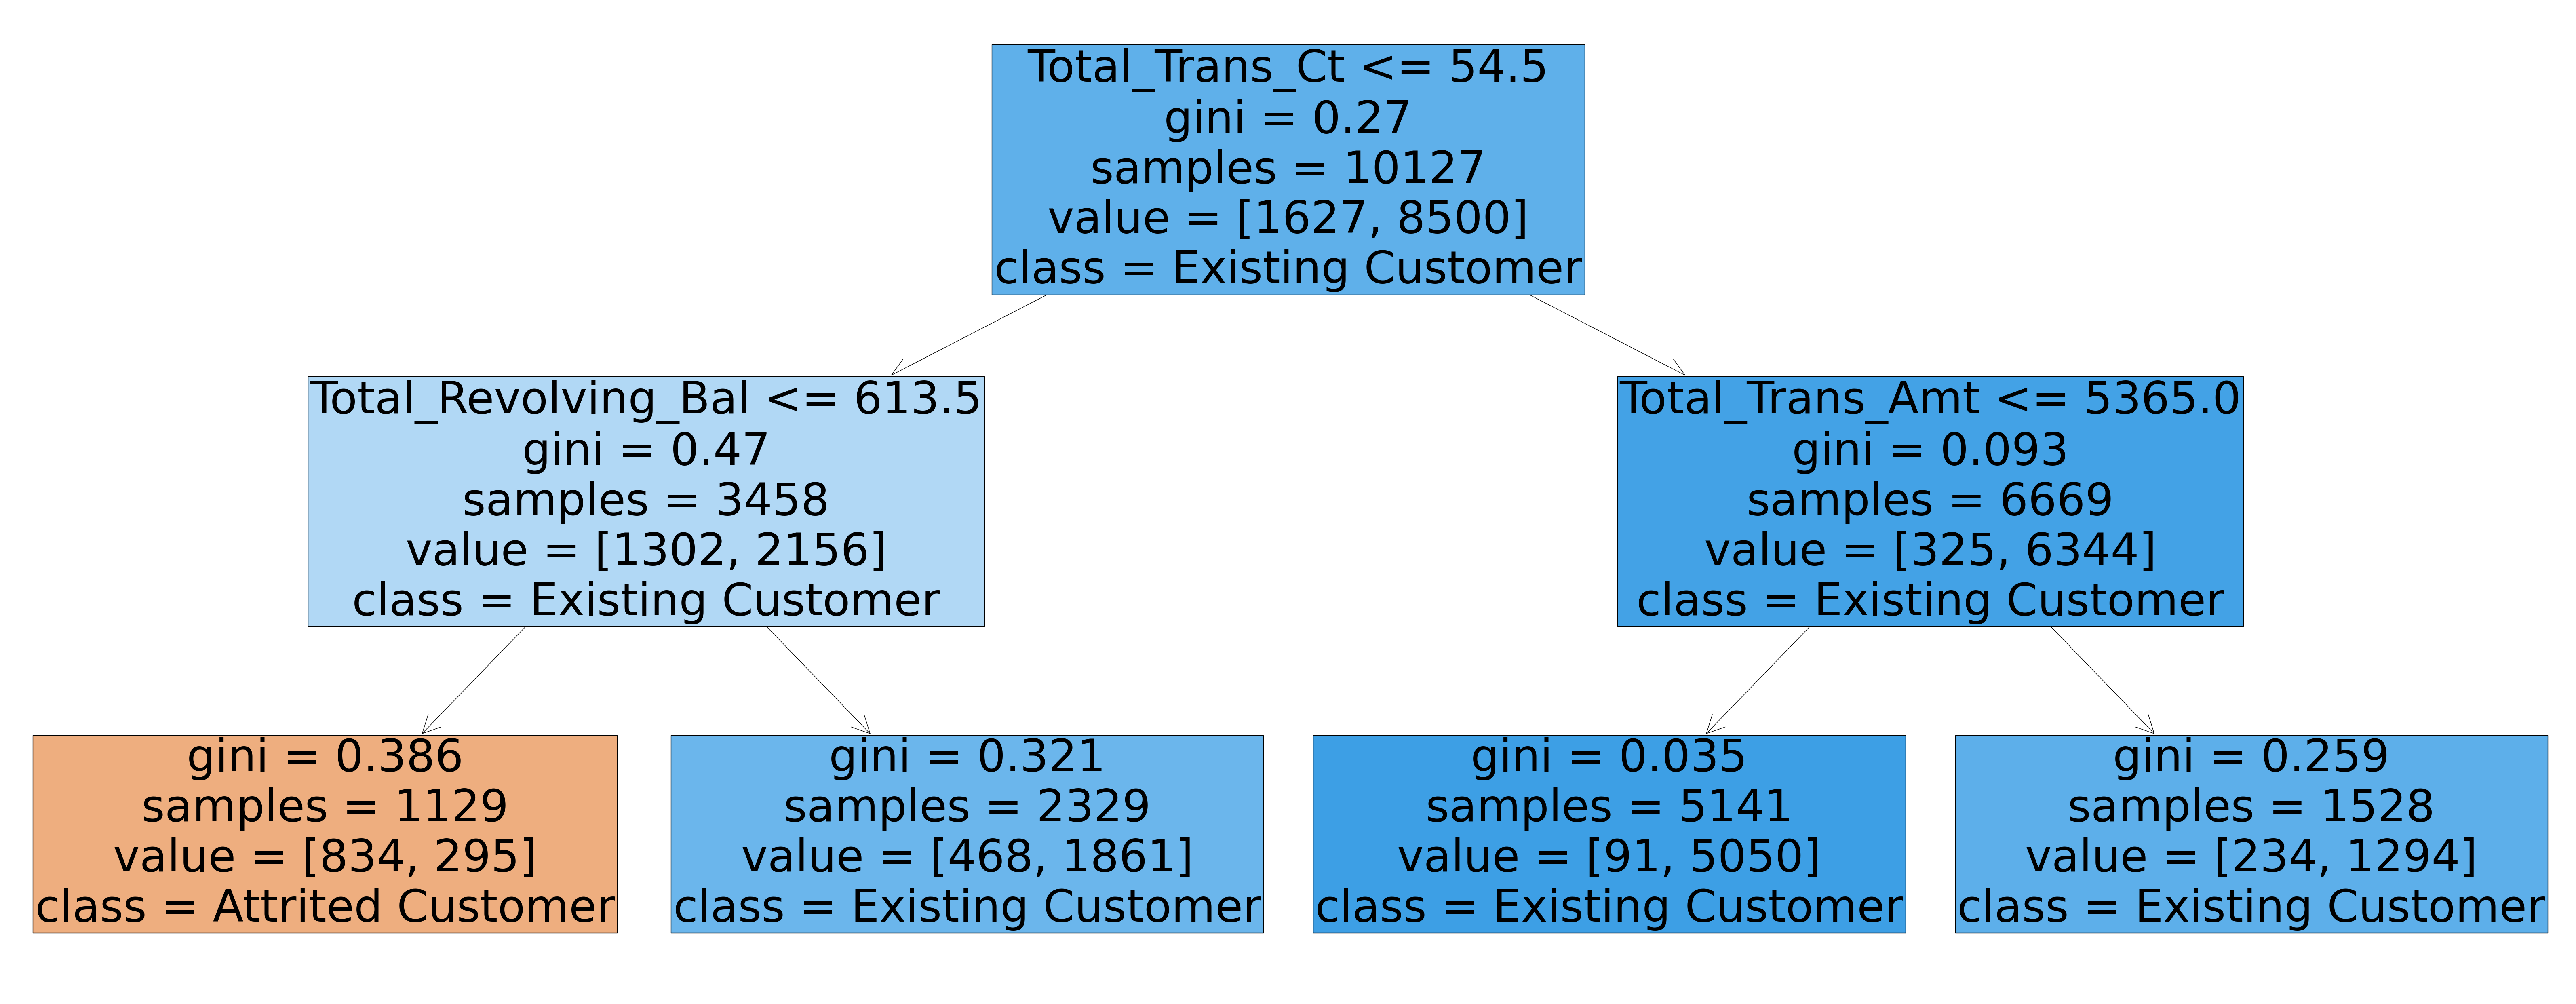

In [20]:
from matplotlib import pyplot as plt
from sklearn import tree

plt.figure(figsize=(82,32)) 
#tree.plot_tree(clf['classifier'].fit(X, y), fontsize=60).fit(X, y)
#tree.plot_tree(clf, fontsize=10)
tree.plot_tree(clf['classifier'], feature_names = clf.feature_names_in_, class_names = clf.classes_, fontsize=80, filled = True)          
plt.show()